# Read Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('file:///D:/Data%20Science%20&%20AI/Praxis%20Data%20Science/Projects%20Praxis/Machine%20Learning%20Project/Banking%20Term%20Deposit/archive/train.csv',sep=',')
print('No of instances before removing duplicates :',df.shape)
df.drop_duplicates
print('No of instances after removing duplicates :',df.shape)
df.head()

No of instances before removing duplicates : (31647, 18)
No of instances after removing duplicates : (31647, 18)


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,Lower_Primary,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,Higher_Education,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
#No Duplicates Found

# Defining Business Problems

# A bank wants to improve its marketing campaigns by targeting potential customers who are more likely to subscribe to term deposits. Currently, the bank's marketing efforts are not yielding satisfactory results, as they are not effectively identifying the customers who are most likely to convert.

# To address this problem, the bank plans to develop a machine learning model that can predict the likelihood of a customer subscribing to a term deposit based on various customer attributes and campaign-related factors. The model will assist the bank in prioritizing and customizing their marketing efforts, leading to better conversion rates and increased profitability.

# 1.How accurately can we predict the likelihood of a customer subscribing to a term deposit?

# 2.Which customer attributes and campaign-related factors are most influential in predicting the likelihood of a customer subscribing to a term deposit?

# 3.How can the bank optimize its marketing strategies to increase the conversion rates for term deposits?

# Identify Features Available In This Dataset

Age-Age of the customers.
Job-Job they are doing presently.
Maritial-Married or Not.
Education-Individual Education Level.
Housing-Refers to whether or not the client has a housing loan.
Loan-Taking Loan Status.
Default-whether or not the client has previously defaulted on a loan or credit
Balance-It represents the account balance of the client
Contact-Way of contact.
Day-Day of the month.
Month-Month Name.
duration- This refers to the duration or term length of the term deposit. 
Campagin- This feature represents the marketing campaign associated with the term deposit 
Pdays-represents the number of days that have passed since the customer was last contacted or reached out to regarding a term deposit.
Previous-The "previous" feature generally refers to the customer's previous interactions or engagements with the bank.
poutcome- interaction with the customer regarding a term deposit.
Subscribed- For term depsoit

# Exploratory  Data Analysis

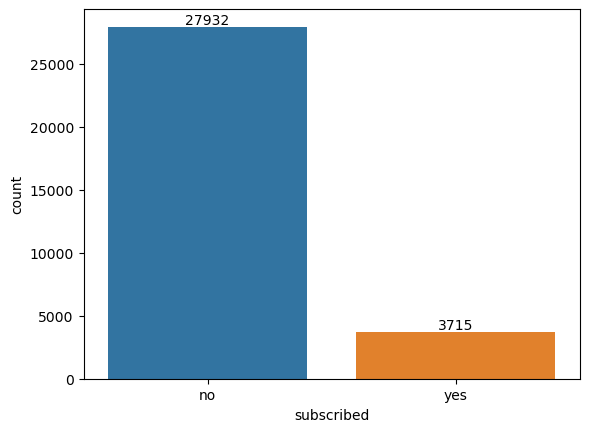

In [4]:
#Checking Target Variable Balanced or Imbalanced
b0=sns.countplot(x='subscribed',data=df)
for label in b0.containers:
    b0.bar_label(label)
plt.show()

In [5]:
#Found Dataset is imbalanced,we will treat this later by applying oversampling the minor class or using smote technique

In [6]:
#Checking basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [7]:
df.describe(include='number')

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
#ID-Irrelevant feature,later stage drop it.
#Age-Clients avg age 40 yrs
#Balance-large difference between min and max range so there might be outliers present in this feature.

In [9]:
df.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,31647,31647,31647,31647,31647,31647,31647,31647,31647,31647
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,6842,19095,16224,31062,17584,26516,20423,9669,25929,27932


In [10]:
#Blue collar job clients are highest
#Married clinets more
#Secondary education qualification clients are more
#Maximum no of clients alrdy having housing loan

In [11]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [12]:
#9 Categorical columns including dependent variable.
#9 integer columns

In [13]:
#drop irrelevant columns
df.drop('ID',inplace=True,axis=1)

In [14]:
#Renaming Columns for better understanding purpose
df.rename(columns={'pdays':'cust_last_contacted','poutcome':'previous_interaction'},inplace=True)

# Univariate Analysis

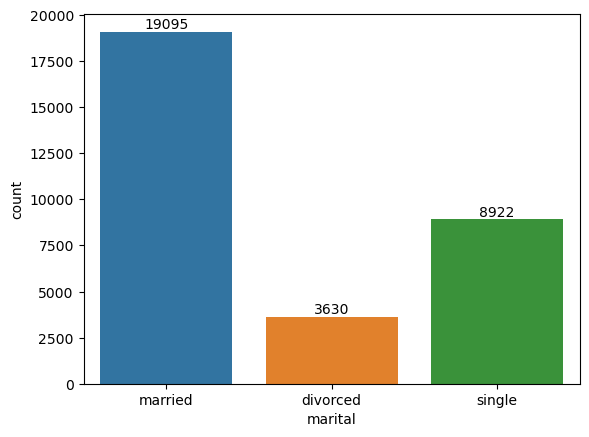

In [15]:
# Visualizing Categorical Variables
b1=sns.countplot(x='marital',data=df)
for label in b1.containers:
    b1.bar_label(label)
plt.show()

In [16]:
#Maried clients are higher than compare to other groups.

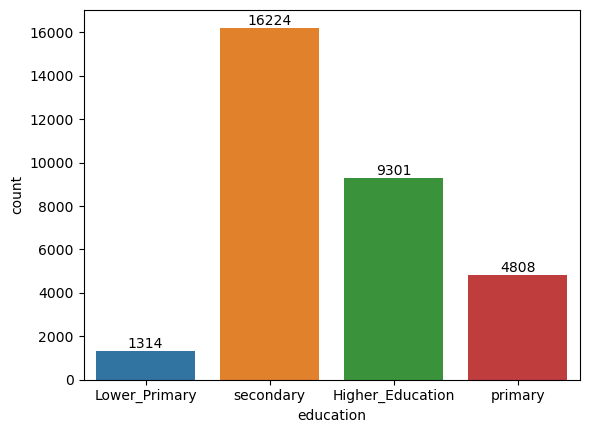

In [17]:
##Education
b2=sns.countplot(x='education',data=df)
for label in b2.containers:
    b2.bar_label(label)
plt.show()

In [18]:
#Secondary education level clients than others

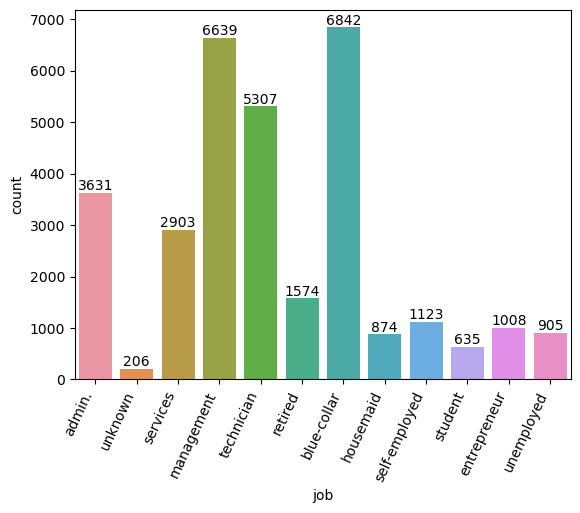

In [19]:
#Job
b3=sns.countplot(x='job',data=df)
plt.xticks(rotation=65, horizontalalignment='right')
for label in b3.containers:
    b3.bar_label(label)
plt.show()

In [20]:
#Management working professionals signed term deposit more followed by technician

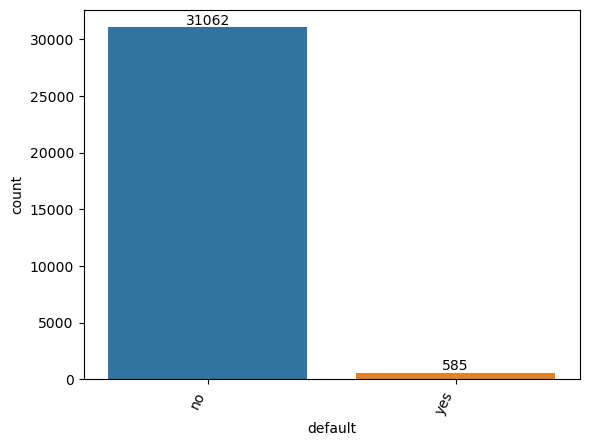

In [21]:
#default
b4=sns.countplot(x='default',data=df)
plt.xticks(rotation=65, horizontalalignment='right')
for label in b4.containers:
    b4.bar_label(label)
plt.show()

In [22]:
#Offering a term deposit to these 41 loan defaulters clients may increase the risk of early withdrawal

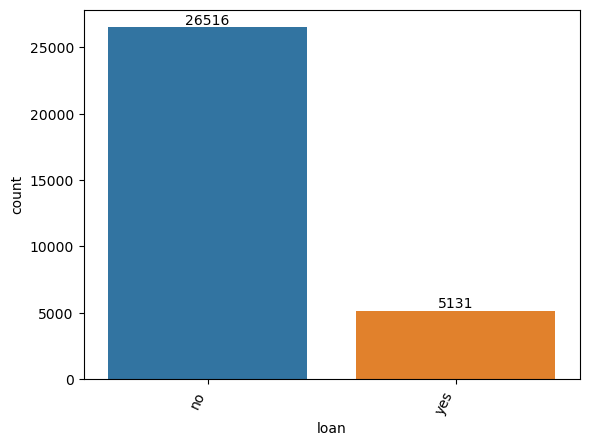

In [23]:
#Loan
b5=sns.countplot(x='loan',data=df)
plt.xticks(rotation=65, horizontalalignment='right')
for label in b5.containers:
    b5.bar_label(label)
plt.show()

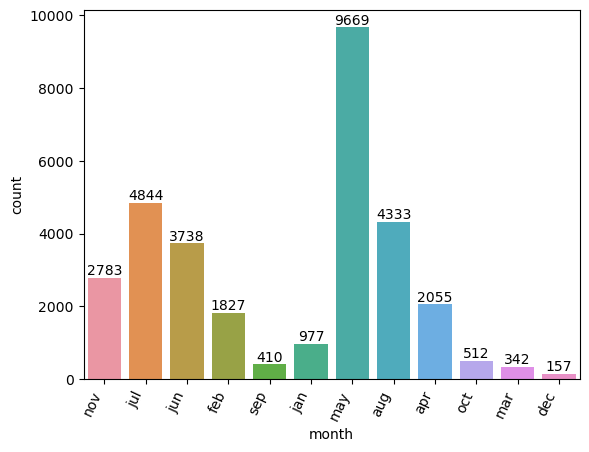

In [24]:
#Month
b6=sns.countplot(x='month',data=df)
plt.xticks(rotation=65, horizontalalignment='right')
for label in b6.containers:
    b6.bar_label(label)
plt.show()

In [25]:
#May month having higher term deposit subscribed

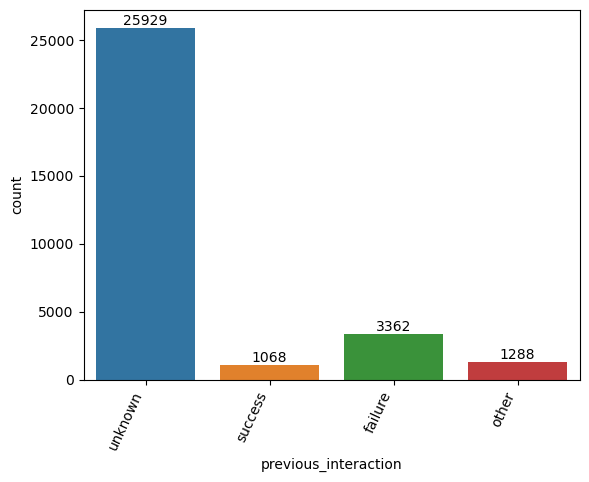

In [26]:
#Previcious outcome
b7=sns.countplot(x='previous_interaction',data=df)
plt.xticks(rotation=65, horizontalalignment='right')
for label in b7.containers:
    b7.bar_label(label)
plt.show()

In [27]:
#Previous interaction with clients outcome result as success is not a good sign

# Q.Having existing house loan

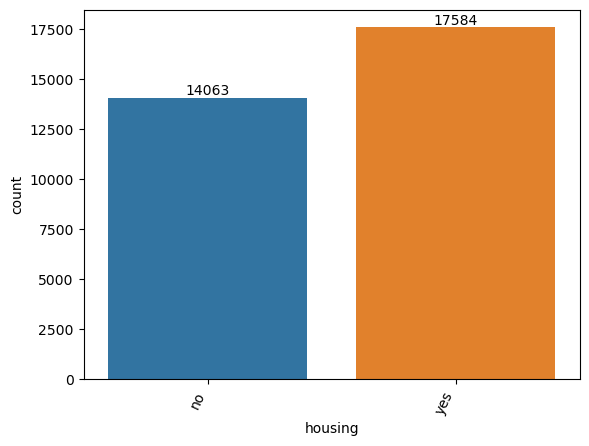

In [28]:
#Housing
b8=sns.countplot(x='housing',data=df)
plt.xticks(rotation=65, horizontalalignment='right')
for label in b8.containers:
    b8.bar_label(label)
plt.show()

In [29]:
cont_col=list(df[df.dtypes[df.dtypes=='int64'].index].columns)

# Distribution Plot

C:\Users\dipam\AppData\Local\Temp\ipykernel_14912\3844355275.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axes[i])
C:\Users\dipam\AppData\Local\Temp\ipykernel_14912\3844355275.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axes[i])
C:\Users\dipam\AppData\Local

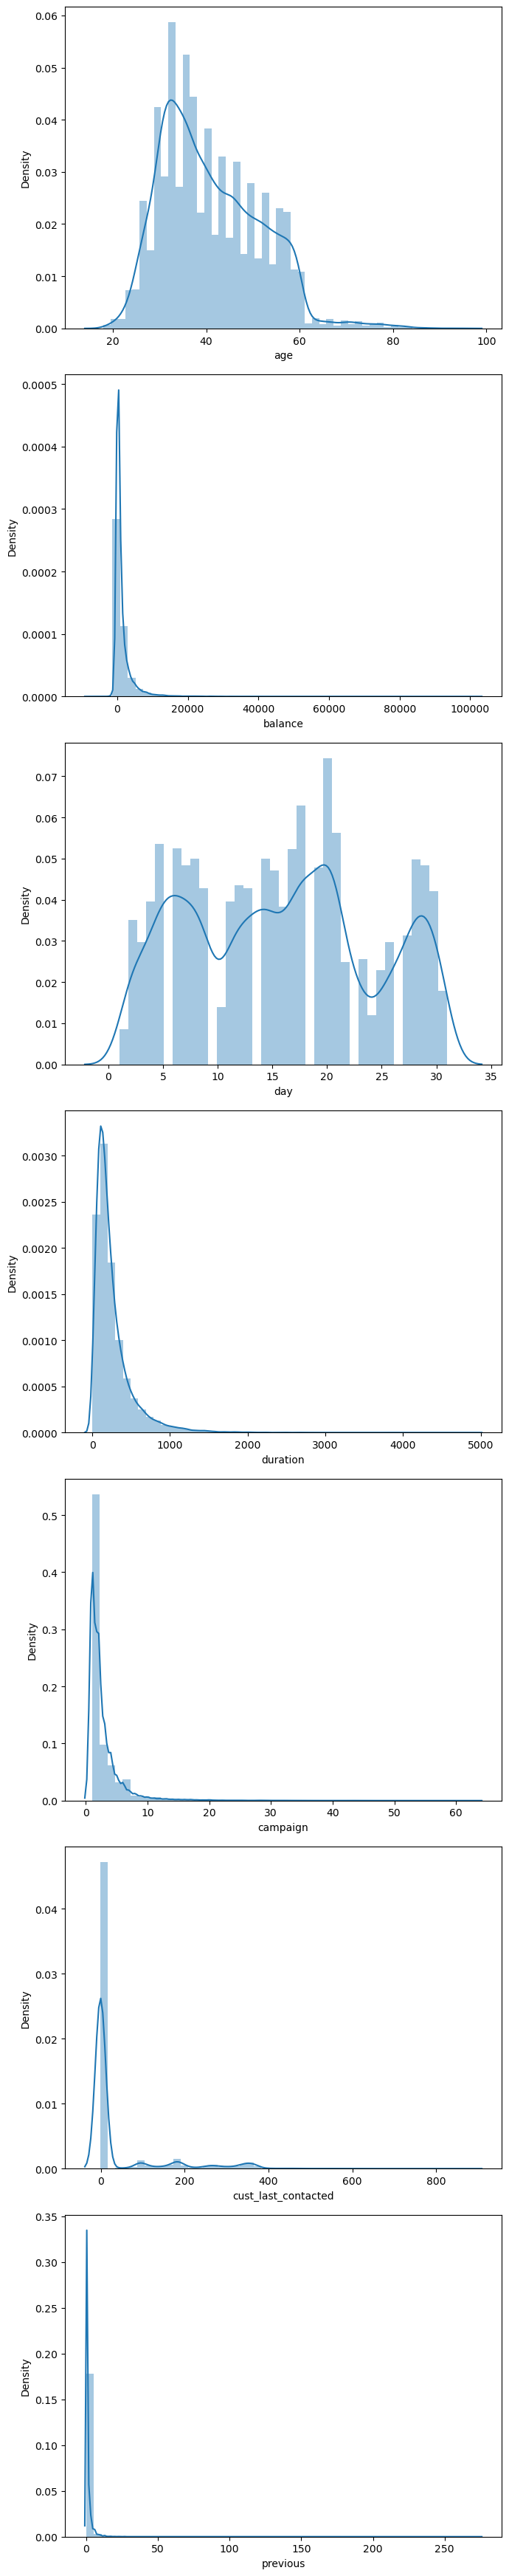

In [30]:
fig, axes = plt.subplots(len(cont_col), 1, figsize=(7, 5*len(cont_col)))

for i, col in enumerate(cont_col):
    sns.distplot(df[col], ax=axes[i])

plt.tight_layout()
plt.show()

In [31]:
#High skewness present in most of the columns,we dont need to treat this as logistic regression does not assume any normality assumption of the independent variables

## Missing Values

In [32]:
df.isnull().sum()

age                     0
job                     0
marital                 0
education               0
default                 0
balance                 0
housing                 0
loan                    0
contact                 0
day                     0
month                   0
duration                0
campaign                0
cust_last_contacted     0
previous                0
previous_interaction    0
subscribed              0
dtype: int64

In [33]:
#no missing values present

## checking outliers and if it is present we need to treat outliers

<Axes: >

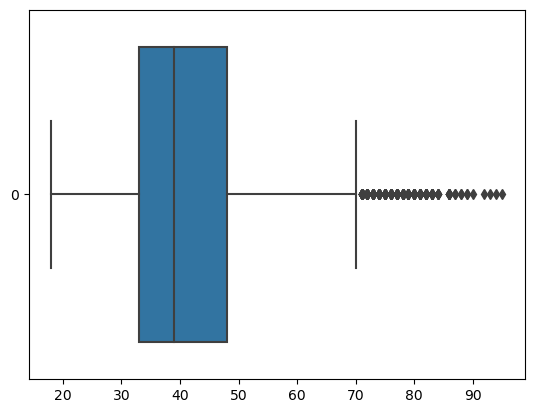

In [34]:
sns.boxplot(data=df['age'],orient='hue')

<Axes: >

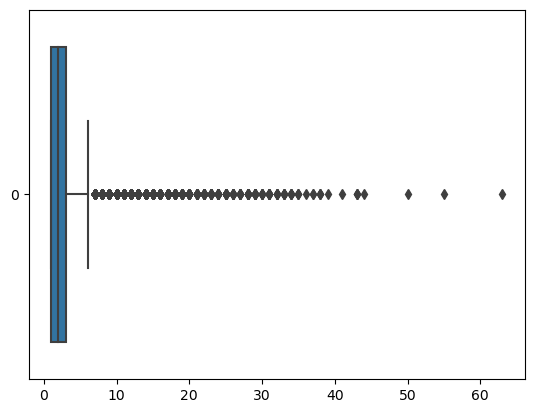

In [35]:
sns.boxplot(data=df['campaign'],orient='hue')

In [36]:
def outlier_findings(inpdata):
    quantile1, quantile3= np.percentile(inpdata,[25,75])
    print('Quartile 1 :',quantile1,'Quartile 3 :',quantile3)
    iqr_value=quantile3-quantile1
    
    print("Inter Quartile Range :",iqr_value)
    lower_bound_val = quantile1 -(1.5 * iqr_value) 
    upper_bound_val = quantile3 +(1.5 * iqr_value) 
    
    print("Min Whisker :",lower_bound_val,"Max Whiker :",upper_bound_val)
    lower_outliers = np.where(inpdata < lower_bound_val)
    upper_outliers = np.where(inpdata > upper_bound_val)
    
    print("Number of values below the lower bound:", len(lower_outliers[0]))
    print("Number of values above the upper bound:", len(upper_outliers[0]))
    

In [37]:
outlier_findings(inpdata=df['age'])

Quartile 1 : 33.0 Quartile 3 : 48.0
Inter Quartile Range : 15.0
Min Whisker : 10.5 Max Whiker : 70.5
Number of values below the lower bound: 0
Number of values above the upper bound: 349


In [38]:
outlier_findings(inpdata=df['balance'])

Quartile 1 : 73.0 Quartile 3 : 1431.0
Inter Quartile Range : 1358.0
Min Whisker : -1964.0 Max Whiker : 3468.0
Number of values below the lower bound: 12
Number of values above the upper bound: 3287


In [39]:
outlier_findings(inpdata=df['duration'])

Quartile 1 : 104.0 Quartile 3 : 318.5
Inter Quartile Range : 214.5
Min Whisker : -217.75 Max Whiker : 640.25
Number of values below the lower bound: 0
Number of values above the upper bound: 2288


In [40]:
outlier_findings(inpdata=df['campaign'])

Quartile 1 : 1.0 Quartile 3 : 3.0
Inter Quartile Range : 2.0
Min Whisker : -2.0 Max Whiker : 6.0
Number of values below the lower bound: 0
Number of values above the upper bound: 2126


In [41]:
 outlier_findings(inpdata=df['cust_last_contacted'])

Quartile 1 : -1.0 Quartile 3 : -1.0
Inter Quartile Range : 0.0
Min Whisker : -1.0 Max Whiker : -1.0
Number of values below the lower bound: 0
Number of values above the upper bound: 5723


### Treating outliers with winsorization technique

We can impute outliers in various way like mean/median imputation,Winsorization, Turkey's hinge method. Here we are treating the outliers with Turkey's hinge method. Tukey's hinge method is a type of data transformation technique that involves Winsorizing a dataset at the 25th and 75th percentiles, also known as the hinges. The goal of Tukey's hinge method is to reduce the impact of outliers while preserving the central tendency and spread of the dataset.

In [42]:
cont_col1=df[['age',
 'balance',
 'day',
 'duration',
'campaign',
'cust_last_contacted']]

In [43]:
for i in cont_col1:
    q1 = np.percentile(df[i], 25)
    q3 = np.percentile(df[i], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[i] = np.where(df[i] > upper_bound, upper_bound,np.where(df[i] < lower_bound,lower_bound,df[i]))

<Axes: >

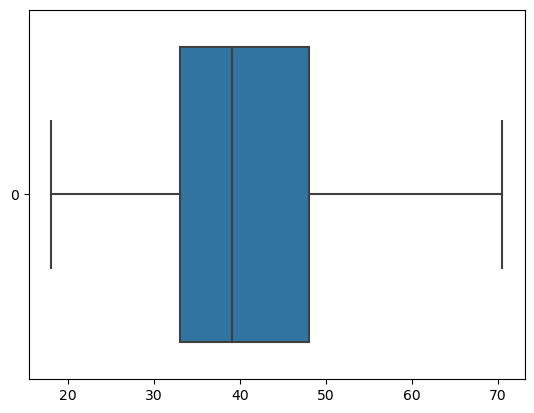

In [44]:
sns.boxplot(data=df['age'],orient='hue')

In [45]:
##Checking any further data cleaning require or not

In [46]:
cat_col=list(df[df.dtypes[df.dtypes=='object'].index].columns)

In [47]:
for i in cat_col:
    print(df[i].unique())

['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
['married' 'divorced' 'single']
['Lower_Primary' 'secondary' 'Higher_Education' 'primary']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['telephone' 'cellular' 'unknown']
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
['unknown' 'success' 'failure' 'other']
['no' 'yes']


# Bivariate Analysis

## In this step we are analysing how categorical predictors have relstionship with target variable

### Q: Do married people are more concerned for the term deposit?

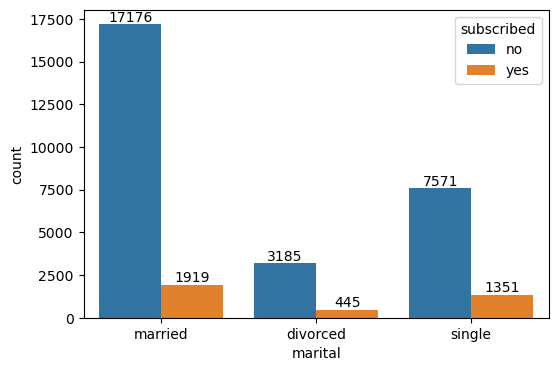

In [48]:
plt.figure(figsize=(6,4))
a1=sns.countplot(x='marital',data=df,hue='subscribed')
for label in a1.containers:
    a1.bar_label(label)
plt.show()

In [49]:
#yes they do more concerned

### Q:Does education one of the key reason to subscribe term deposit

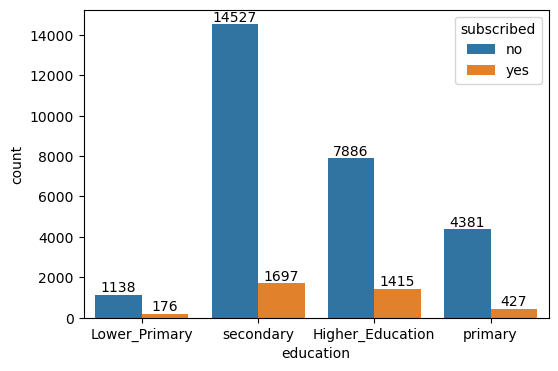

In [50]:
plt.figure(figsize=(6,4))
a2=sns.countplot(x='education',data=df,hue='subscribed')
for label in a2.containers:
    a2.bar_label(label)
plt.show()

In [51]:
#Though secondary education level has higher subscription but the observation is also high,best result we can observe from this insight is Higher Education Level

### Q:Which Job type likely to subscribe for the fixed deposit

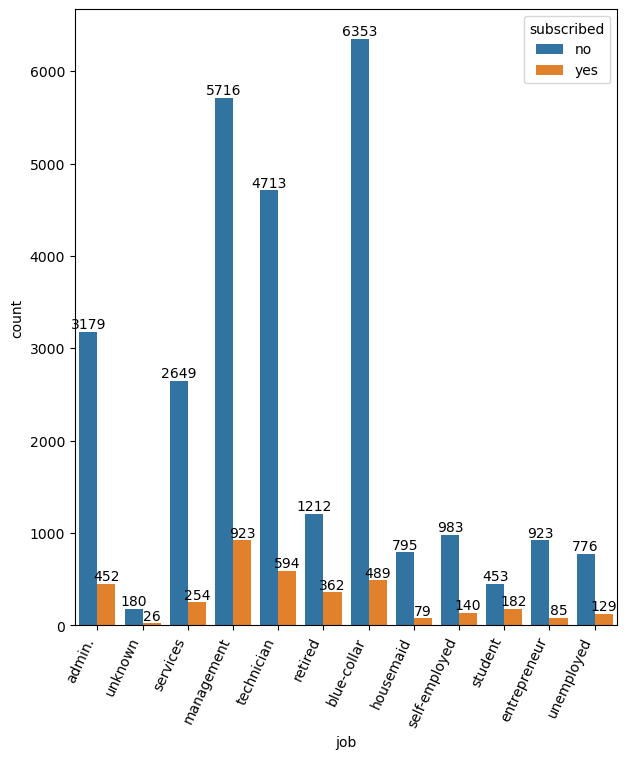

In [52]:
plt.figure(figsize=(7,8))
a3=sns.countplot(x='job',data=df,hue='subscribed',orient="v")
plt.xticks(rotation=65, horizontalalignment='right')
for label in a3.containers:
    a3.bar_label(label)
plt.show()


In [53]:
#Technician people likely to subscribe more for term deposit compare to others

### Q:Previous loan defaulter risk status

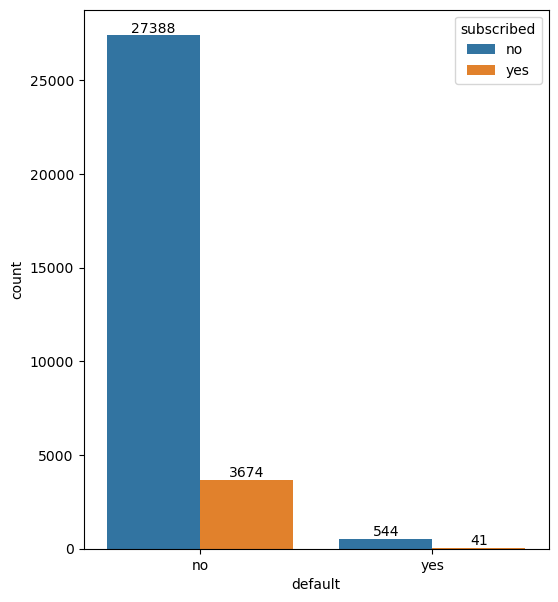

In [54]:
plt.figure(figsize=(6,7))
a4=sns.countplot(x='default',data=df,hue='subscribed',orient="v")
for label in a4.containers:
    a4.bar_label(label)
plt.show()

In [55]:
#Loan defaulters have the low subscription number but there are 41 people who might be risky ones.These individuals may not have the necessary financial resources to maintain the deposit until maturity

### Q:Does Previous housing loan effect the subscription of fixed deposit

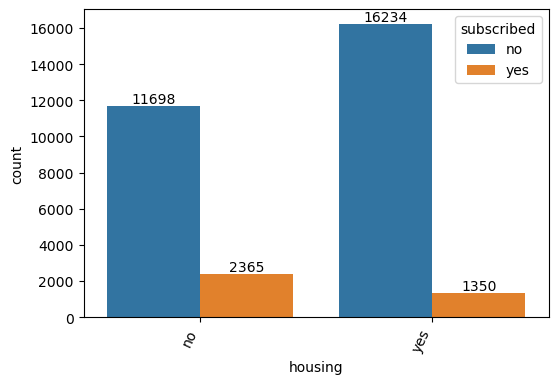

In [56]:
plt.figure(figsize=(6,4))
a9=sns.countplot(x='housing',data=df,hue='subscribed',orient="v")
plt.xticks(rotation=65, horizontalalignment='right')
for label in a9.containers:
    a9.bar_label(label)
plt.show()

In [57]:
#No there is no such relation any person having housing loan and their fixed deposit subscription

### Q:Does Previous loan effect the subscription of fixed deposit

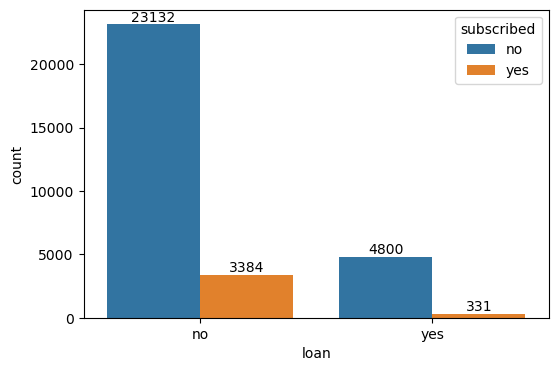

In [58]:
plt.figure(figsize=(6,4))
a5=sns.countplot(x='loan',data=df,hue='subscribed',orient="v")
for label in a5.containers:
    a5.bar_label(label)
plt.show()

In [59]:
#Yes,having previous loan individuals dont likely to subscribe fixed deposit

### Q: In which Month Subscription is High

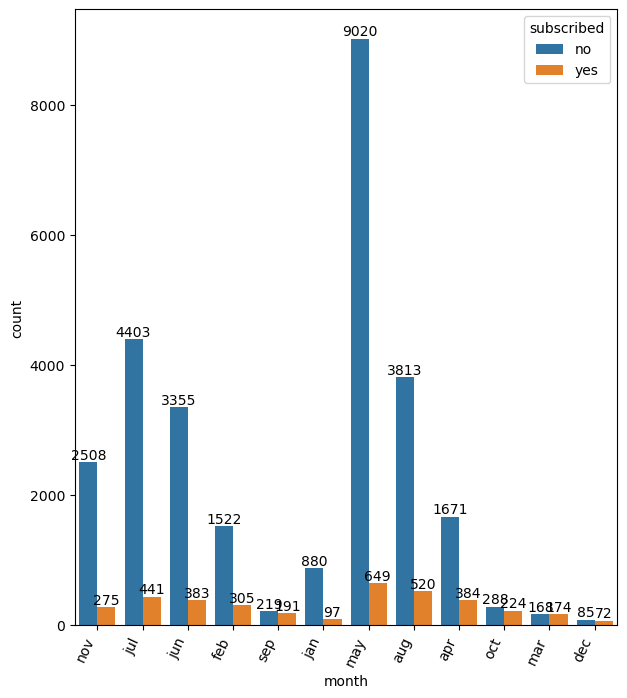

In [60]:
plt.figure(figsize=(7,8))
a7=sns.countplot(x='month',data=df,hue='subscribed',orient="v")
plt.xticks(rotation=65, horizontalalignment='right')
for label in a7.containers:
    a7.bar_label(label)
plt.show()

In [61]:
#It could coincide with tax refund season, year-end bonuses in may month having higher number of subscription

### Q:Previous Interation with client and Subscription Status

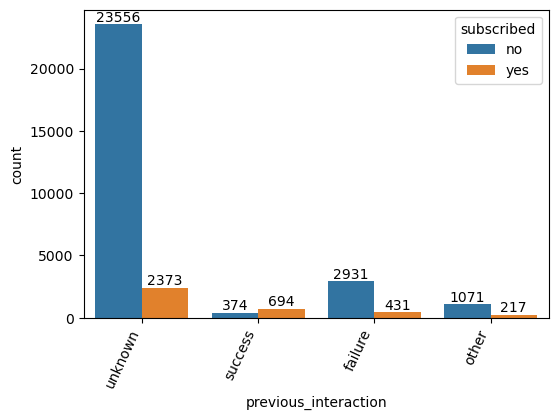

In [62]:
plt.figure(figsize=(6,4))
a8=sns.countplot(x='previous_interaction',data=df,hue='subscribed',orient="v")
plt.xticks(rotation=65, horizontalalignment='right')
for label in a8.containers:
    a8.bar_label(label)
plt.show()

### Which age group subscription is high

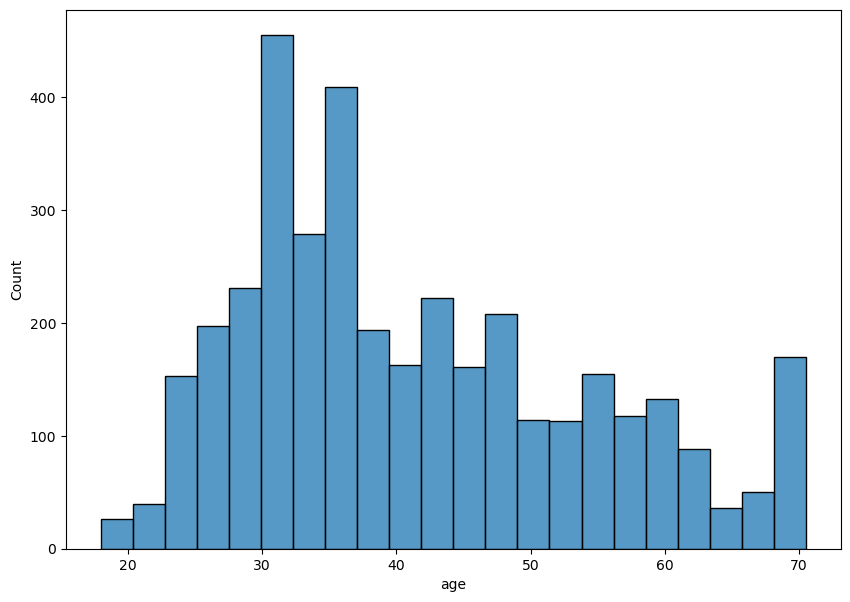

In [63]:
plt.figure(figsize=(10,7))
data1=df[df['subscribed']=='yes']
sns.histplot(x='age',data=data1)
plt.show()

In [64]:
#from the above chart we can observed that the term deposit subscription age group is more between the age fgroup of 30-36 yrs approxmately

# Checking Correlation

C:\Users\dipam\AppData\Local\Temp\ipykernel_14912\3594340093.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), linewidths=1.0, annot=True, fmt=".2f", cmap='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

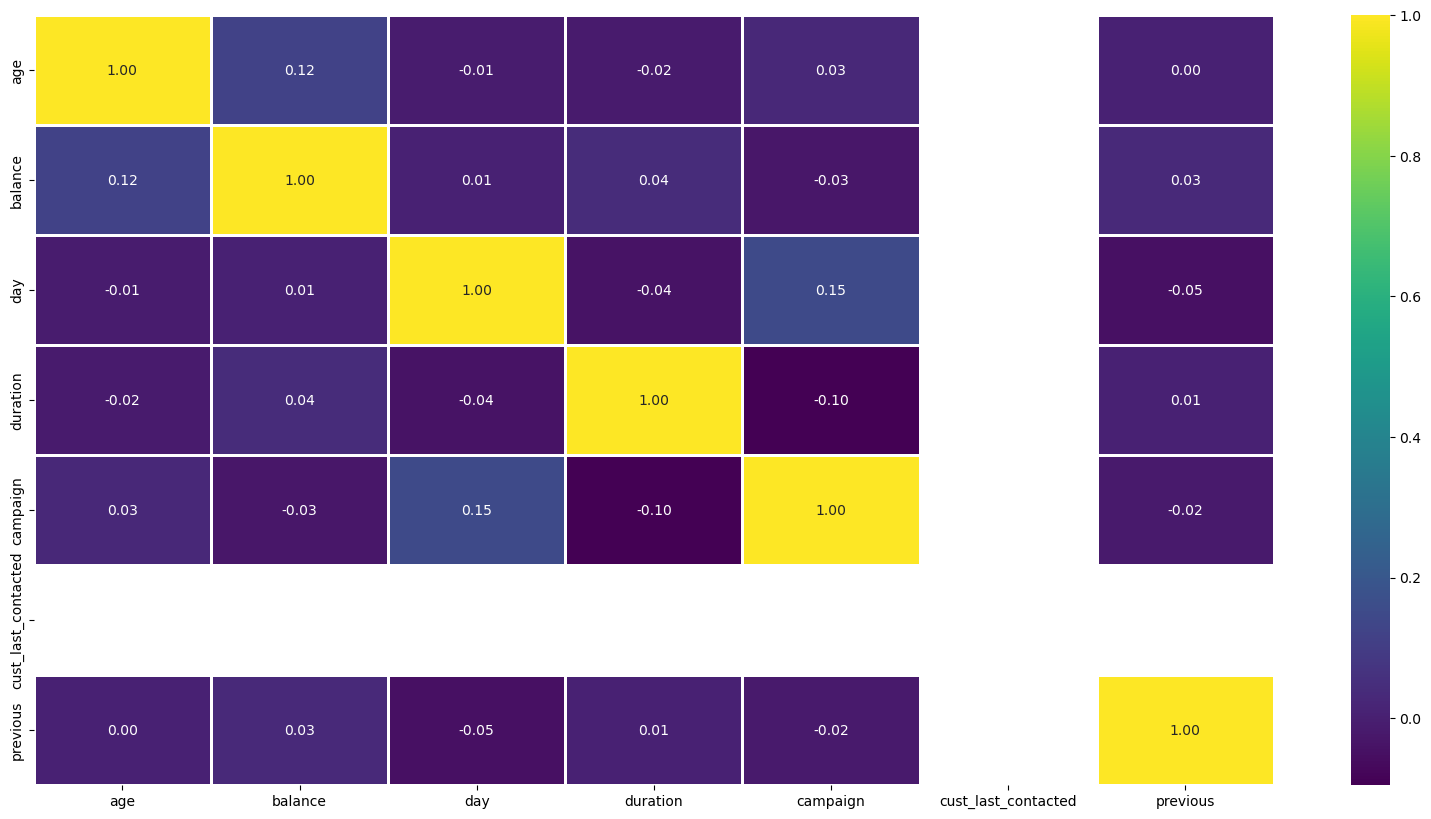

In [65]:
# CORRELATION PLOT

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), linewidths=1.0, annot=True, fmt=".2f", cmap='viridis')
plt.show

In [66]:
#From the above chart we can see that the not so much dependency with one variable with another

In [67]:
#calculating vif to check the multicollineairty range

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    
    non_numeric_cols = data.select_dtypes(exclude=np.number).columns.tolist()
    if non_numeric_cols:
        data = data.select_dtypes(include=np.number)
    

    if data.isnull().any().any():
        data = data.dropna()
    
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    return vif_data

vif_scores = calculate_vif(df)

print(vif_scores.sort_values(by="VIF"))


               Feature        VIF
6             previous   1.003568
3             duration   1.011767
0                  age   1.016832
1              balance   1.019234
2                  day   1.026945
4             campaign   1.033540
5  cust_last_contacted  24.131684


In [68]:
#Above observation one feature found crossing multicollineairty limit 10,so we can drop this with this

# Treating Categorical Variables

In [69]:
#df['cust_last_contacted'].head(20)

In [70]:
df['subscribed']=df['subscribed'].replace({'yes': 1, 'no': 0})
df['education']=df['education'].replace({'Lower_Primary':0,'secondary':1,'Higher_Education':2,'primary':3})
df_dummies=pd.get_dummies(df,drop_first=True)

In [71]:
df_dummies.columns

Index(['age', 'education', 'balance', 'day', 'duration', 'campaign',
       'cust_last_contacted', 'previous', 'subscribed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'previous_interaction_other',
       'previous_interaction_success', 'previous_interaction_unknown'],
      dtype='object')

# Separating Target & Predictors

In [72]:
X = df_dummies.drop(['subscribed','cust_last_contacted'], axis = 1)
#X=df_dummies[['duration', 'previous', 'job_services', 'contact_telephone', 'month_aug', 'month_jul', 'month_jun', 'month_nov', 'month_oct', 'previous_interaction_other']]
#X=df_dummies[['balance', 'duration', 'campaign', 'cust_last_contacted', 'previous']]
#X=df_dummies[['age', 'balance', 'day', 'duration', 'campaign', 'previous','job_blue-collar', 'job_entrepreneur', 'job_management', 'job_services', 'job_technician', 'job_unemployed', 'job_unknown', 'default_yes', 'housing_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'previous_interaction_other']]
y = df_dummies['subscribed']

# Spliting Data into Train & Test

In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=MinMaxScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5649)

In [74]:
from collections import Counter
print(Counter(y_train))

Counter({0: 22347, 1: 2970})


In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25317, 39), (6330, 39), (25317,), (6330,))

# Treating Target Variable

In [76]:
from imblearn.over_sampling import RandomOverSampler
RO = RandomOverSampler(sampling_strategy='minority')

In [77]:
X_train_os,y_train_os = RO.fit_resample(X_train,y_train)

In [78]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_os))

Counter({0: 22347, 1: 2970})
Counter({0: 22347, 1: 22347})


In [79]:
X_train_os.shape, X_test.shape, y_train_os.shape, y_test.shape

((44694, 39), (6330, 39), (44694,), (6330,))

# Feature Selection

In [80]:
#RFECV FOR FEATURE SELECTION

In [81]:
# from sklearn.feature_selection import RFECV
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# rfe = RFECV(estimator=model,cv=10,step=1)# Specify the desired number of features to select
# rfe.fit(X, y)
# selected_features = np.where(rfe.support_)[0]
# print("Selected feature indices:", selected_features.tolist())

In [82]:
# column_names = df_dummies.columns.tolist()
# index_numbers = [0, 2, 3, 4, 5, 7, 8, 9, 10, 12, 15, 17, 18, 19, 22, 23, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38] 
# selected_columns = [column_names[i] for i in index_numbers]
# print("Selected columns:", selected_columns)

# Since there is no accuracy betterment found out after feature selection has been done rather including all features give the better accuracy so we can skip this step

# Modeling Phase

In [83]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score,roc_curve

In [84]:
def classification_metrics(x,y) :
    accuracy = metrics.accuracy_score(x,y)
    F1_score= metrics.f1_score(x,y,average='macro')
    precision = metrics.precision_score(x,y)
    recall=metrics.recall_score(x,y)
    cm= metrics.confusion_matrix(x,y)
    
    print('accuracy score is :',accuracy )
    print('F1 score is :',F1_score )
    print('precision score is :',precision )
    print('recall score is :',recall )
    sns.heatmap(cm,annot=True,cmap='Purples',fmt='g')
    plt.title('Confusion Matrix',fontsize=16)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

# Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train_os,y_train_os)
y_predLRtrain=LR.predict(X_train_os)
y_predLR=LR.predict(X_test)

accuracy score is : 0.8287018391730434
F1 score is : 0.8287014879240491
precision score is : 0.8277631520235599
recall score is : 0.8301337987201861


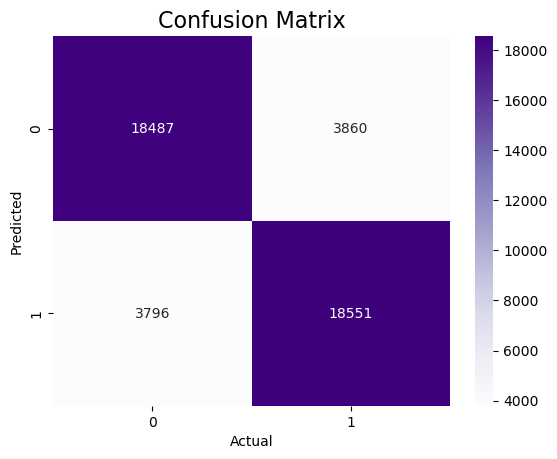

In [86]:
classification_metrics(y_train_os,y_predLRtrain)

accuracy score is : 0.8358609794628752
F1 score is : 0.7225754132503757
precision score is : 0.40454545454545454
recall score is : 0.836241610738255


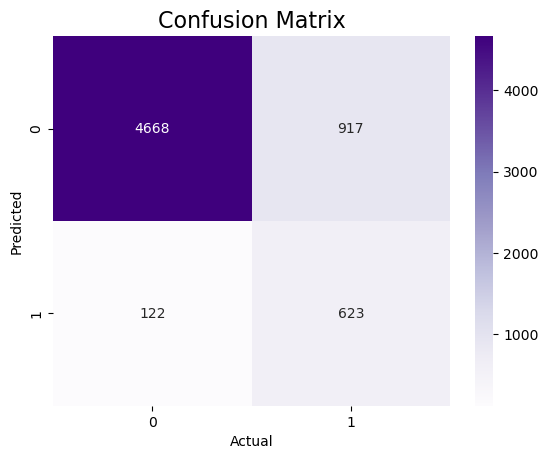

In [87]:
classification_metrics(y_test,y_predLR)

# Identifying which coefficients influenced most

In [88]:
coefficients = LR.coef_[0]
feature_names = np.arange(X_train_os.shape[1])

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

print(coefficients_df)

dominating_feature = coefficients_df.iloc[0]['Feature']
dominating_coefficient = coefficients_df.iloc[0]['Coefficient']
print("Dominating Feature:", dominating_feature)
print("Dominating Coefficient:", dominating_coefficient)

less_dominating_feature = coefficients_df.iloc[-1]['Feature']
less_dominating_coefficient = coefficients_df.iloc[-1]['Coefficient']
print("Less Dominating Feature:", less_dominating_feature)
print("Less Dominating Coefficient:", less_dominating_coefficient)

    Feature  Coefficient
4         4     5.290427
37       37     2.617975
31       31     2.008864
34       34     1.456034
6         6     1.044753
35       35     0.934583
2         2     0.774087
14       14     0.534195
26       26     0.444880
36       36     0.256919
11       11     0.190197
3         3     0.156463
19       19     0.122501
30       30     0.044503
0         0    -0.006807
10       10    -0.026578
23       23    -0.030415
1         1    -0.031924
15       15    -0.108910
20       20    -0.121712
27       27    -0.126795
16       16    -0.234227
38       38    -0.256952
18       18    -0.282890
8         8    -0.313755
17       17    -0.322230
13       13    -0.354847
12       12    -0.396498
7         7    -0.418760
9         9    -0.432619
5         5    -0.617947
22       22    -0.628071
32       32    -0.785767
21       21    -0.790508
25       25    -0.849240
33       33    -1.014102
29       29    -1.082185
28       28    -1.337991
24       24    -1.518042


In [89]:
column_names = df_dummies.columns.tolist()
index_numbers = [4,37,31,34,35]  
selected_columns = [column_names[i] for i in index_numbers]
print("Selected columns:", np.array(selected_columns))

Selected columns: ['duration' 'month_sep' 'month_jul' 'month_may' 'month_nov']


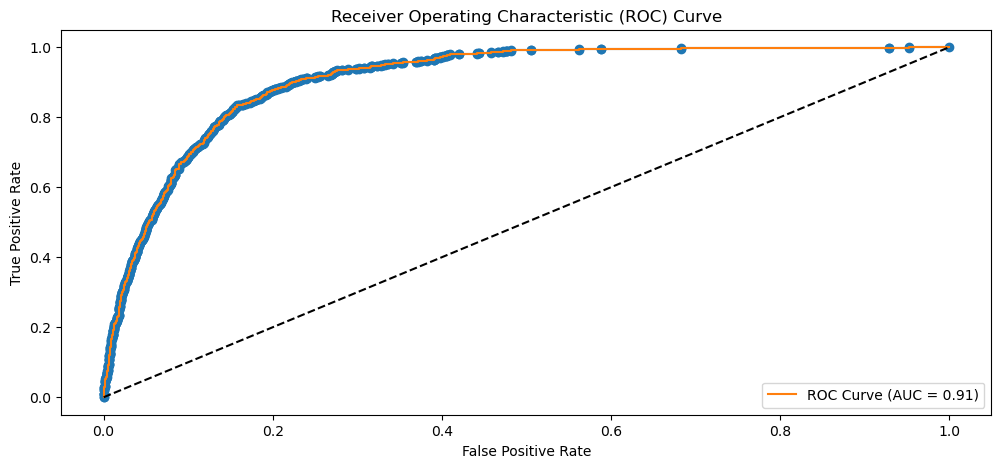

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = LR.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_LR = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, marker ='o')

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_LR)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(max_depth=10,n_estimators=900,criterion='gini',min_samples_leaf=1,min_samples_split=5)
RFC.fit(X_train_os,y_train_os)
y_predRFCTrain=RFC.predict(X_train_os)
y_predRFC=RFC.predict(X_test)

accuracy score is : 0.8844363896719918
F1 score is : 0.8842361115842087
precision score is : 0.8549120052879451
recall score is : 0.926030339642905


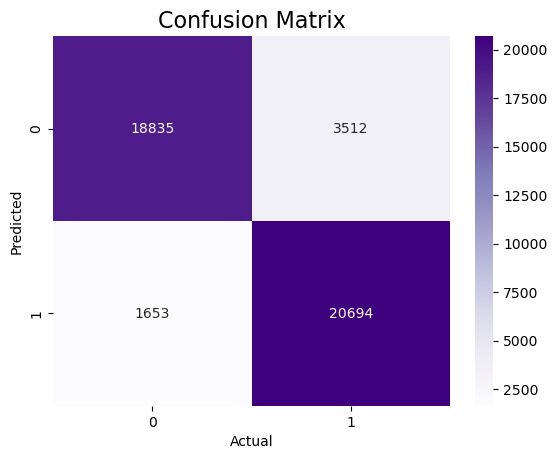

In [92]:
classification_metrics(y_train_os,y_predRFCTrain)

accuracy score is : 0.8398104265402844
F1 score is : 0.7308090599794097
precision score is : 0.41361592806679515
recall score is : 0.8644295302013423


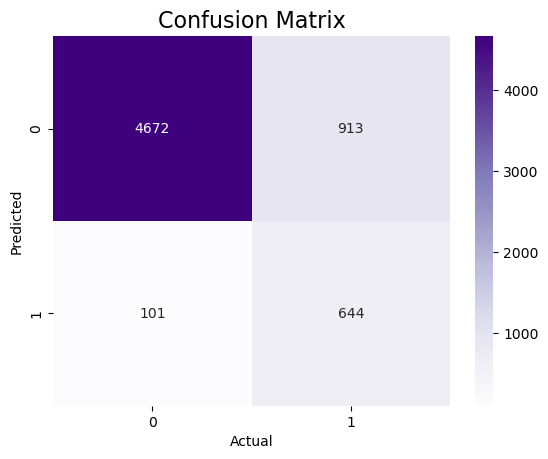

In [93]:
classification_metrics(y_test,y_predRFC) 

# Feature Importance

Top 10 Feature Ranking:
1. Feature 4: Importance 0.4751304952821601
2. Feature 37: Importance 0.0781101700291788
3. Feature 24: Importance 0.06126889023878416
4. Feature 21: Importance 0.04724189325568896
5. Feature 0: Importance 0.040850495523260935
6. Feature 6: Importance 0.03427299042661161
7. Feature 2: Importance 0.032731455083021485
8. Feature 38: Importance 0.028437006035629642
9. Feature 3: Importance 0.025061952594348572
10. Feature 32: Importance 0.02026152507745693


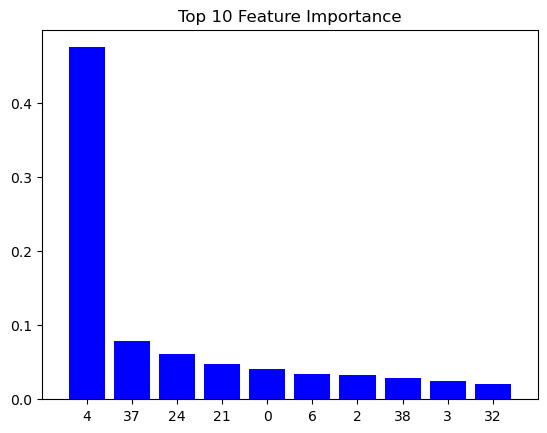

In [94]:
importances = RFC.feature_importances_
indices = np.argsort(importances)[::-1]

print("Top 10 Feature Ranking:")
for f in range(10):
    feature_index = indices[f]
    feature_importance = importances[feature_index]
    print(f"{f+1}. Feature {feature_index}: Importance {feature_importance}")

import matplotlib.pyplot as plt

plt.figure()
plt.title("Top 10 Feature Importance")
plt.bar(range(10), importances[indices[:10]], color="b", align="center")
plt.xticks(range(10), indices[:10])
plt.xlim([-1, 10])
plt.show()


In [95]:
column_names = df_dummies.columns.tolist()
index_numbers = [4,37, 24,21,0,6,2,3,38,31]  
selected_columns = [column_names[i] for i in index_numbers]
print("Selected columns:", np.array(selected_columns))

Selected columns: ['duration' 'month_sep' 'loan_yes' 'marital_single' 'age'
 'cust_last_contacted' 'balance' 'day' 'previous_interaction_other'
 'month_jul']


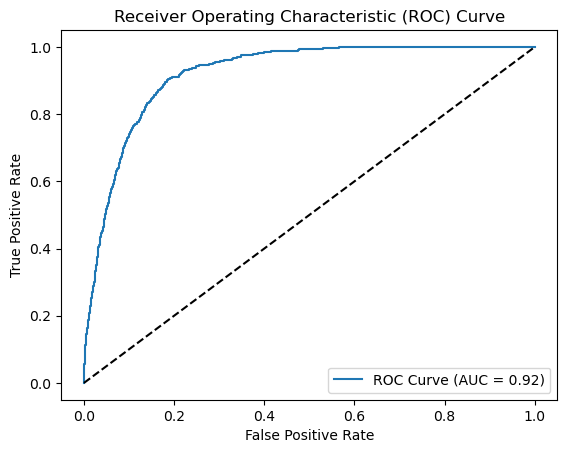

In [105]:
y_pred_prob = RFC.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_RFC = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_RFC)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Applying Optuna For Hyperparameter Tuning

In [106]:
import optuna
def objective(trial):
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    n_estimators = trial.suggest_int("n_estimators", 100, 1000, step=100)
    max_depth = trial.suggest_int("max_depth", 3, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    
    model = RandomForestClassifier(
        criterion=criterion,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
    )

    model.fit(X_train_os, y_train_os)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

best_params = study.best_params
print("Best hyperparameters: {}".format(best_params))


[I 2023-06-25 04:59:51,385] A new study created in memory with name: no-name-94b03857-9bf0-41b4-a7e0-10ff76f309b3
[I 2023-06-25 05:00:27,863] Trial 0 finished with value: 0.8290679304897315 and parameters: {'criterion': 'gini', 'n_estimators': 600, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8290679304897315.
[I 2023-06-25 05:00:42,548] Trial 1 finished with value: 0.795734597156398 and parameters: {'criterion': 'entropy', 'n_estimators': 400, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8290679304897315.
[I 2023-06-25 05:01:03,887] Trial 2 finished with value: 0.8143759873617693 and parameters: {'criterion': 'entropy', 'n_estimators': 400, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8290679304897315.
[I 2023-06-25 05:01:32,548] Trial 3 finished with value: 0.8036334913112164 and parameters: {'criterion': 'entropy', 'n_estimators': 700, '

Best hyperparameters: {'criterion': 'gini', 'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 9}


In [115]:
#!pip install --upgrade shap

In [112]:
import shap
X_test_df = pd.DataFrame(X_test)
random_indices = np.random.choice(X_test_df.shape[0], 100, replace=False)
X_test_subset = X_test_df.iloc[random_indices]
feature_names = X_test_df.columns
random_train_indices = np.random.choice(X_train_os.shape[0], 200, replace=False)
X_train_subset = X_train_os[random_train_indices]
background = shap.sample(X_train_subset, 100)
explainer = shap.KernelExplainer(RFC.predict, background)
explainer.feature_names = feature_names
shap_values = explainer.shap_values(X_test_subset)

  0%|          | 0/100 [00:00<?, ?it/s]

In [113]:
X_test_subset.shape

(100, 39)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


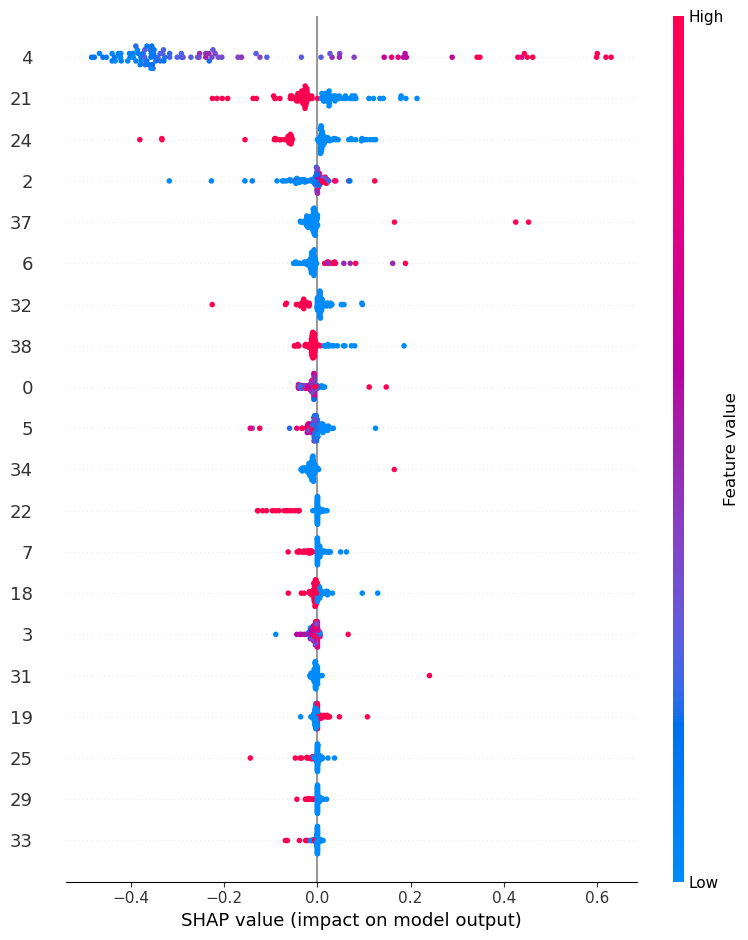

In [114]:
shap.summary_plot(shap_values, X_test_subset)

In [117]:
column_names = df_dummies.columns.tolist()
index_numbers = [4,37, 24,21,2]  
selected_columns = [column_names[i] for i in index_numbers]
print("Selected columns:", np.array(selected_columns))

Selected columns: ['duration' 'month_sep' 'loan_yes' 'marital_single' 'balance']


From the model we can see that the if duration of call less likelihood of subscription is less and this the most impactful
feature,also if previous loan status is "yes" strength is more then liklihood of getting subscription of term deposit is less.Lower 
Balance is impacting negatively towards target.

# Adaboost

In [118]:
from sklearn.ensemble import AdaBoostClassifier
ADAC=AdaBoostClassifier(n_estimators=200,learning_rate=0.92)
ADAC.fit(X_train_os,y_train_os)
y_predADACTrain=ADAC.predict(X_train_os)
y_predADAC=ADAC.predict(X_test)

accuracy score is : 0.8380319505973957
F1 score is : 0.8379982109304935
precision score is : 0.8480785181089301
recall score is : 0.8236004832863472


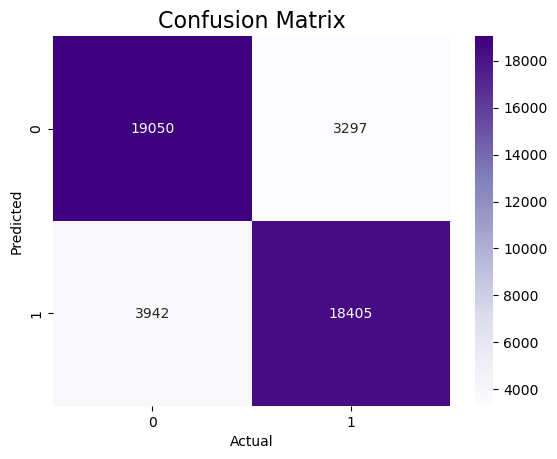

In [119]:
classification_metrics(y_train_os,y_predADACTrain)

accuracy score is : 0.8511848341232228
F1 score is : 0.7390022060368373
precision score is : 0.4313588850174216
recall score is : 0.8308724832214766


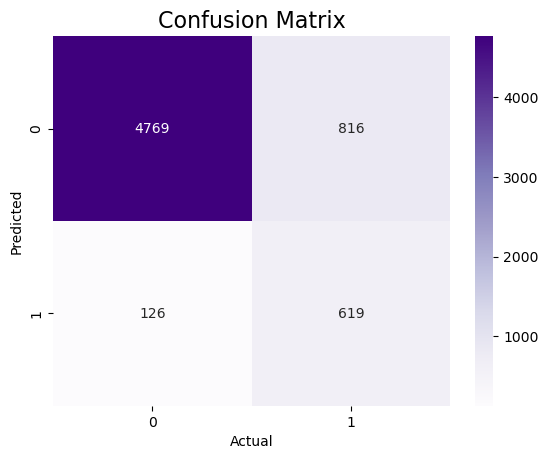

In [120]:
classification_metrics(y_test,y_predADAC)

# Applying Optuna For Hyperparameter Tuning

In [110]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500, step=50)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 1.0, log=True)

    model = AdaBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42,
    )

    model.fit(X_train_os, y_train_os)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

best_params = study.best_params
print("Best hyperparameters: {}".format(best_params))


[I 2023-06-25 05:08:26,241] A new study created in memory with name: no-name-add34275-e35e-49d4-9765-707752b28d27
[I 2023-06-25 05:08:32,260] Trial 0 finished with value: 0.8001579778830964 and parameters: {'n_estimators': 50, 'learning_rate': 0.10725925520859107}. Best is trial 0 with value: 0.8001579778830964.
[I 2023-06-25 05:08:44,932] Trial 1 finished with value: 0.7898894154818326 and parameters: {'n_estimators': 100, 'learning_rate': 0.03234684452412876}. Best is trial 0 with value: 0.8001579778830964.
[I 2023-06-25 05:09:23,887] Trial 2 finished with value: 0.8418641390205371 and parameters: {'n_estimators': 400, 'learning_rate': 0.05583526319344244}. Best is trial 2 with value: 0.8418641390205371.
[I 2023-06-25 05:09:42,995] Trial 3 finished with value: 0.7949447077409163 and parameters: {'n_estimators': 200, 'learning_rate': 0.023804745142353336}. Best is trial 2 with value: 0.8418641390205371.
[I 2023-06-25 05:10:07,726] Trial 4 finished with value: 0.7939968404423381 and pa

Best hyperparameters: {'n_estimators': 500, 'learning_rate': 0.9628485919751404}


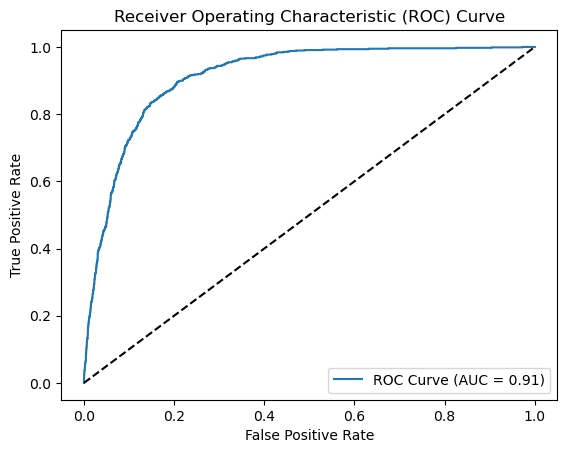

In [111]:
y_pred_prob = ADAC.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_adac = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_adac)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [121]:
import shap
X_test_df = pd.DataFrame(X_test)
random_indices = np.random.choice(X_test_df.shape[0], 100, replace=False)
X_test_subset = X_test_df.iloc[random_indices]
feature_names = X_test_df.columns
random_train_indices = np.random.choice(X_train_os.shape[0], 200, replace=False)
X_train_subset = X_train_os[random_train_indices]
background = shap.sample(X_train_subset, 100)
explainer = shap.KernelExplainer(ADAC.predict, background)
explainer.feature_names = feature_names
shap_values = explainer.shap_values(X_test_subset)

  0%|          | 0/100 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


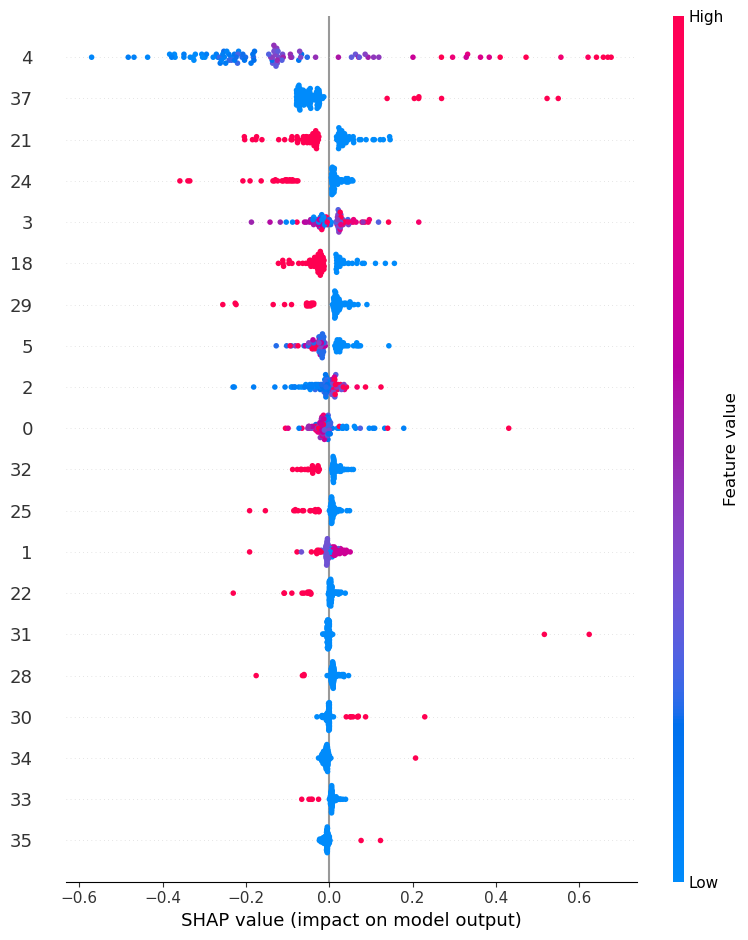

In [122]:
shap.summary_plot(shap_values, X_test_subset)

In [125]:
column_names = df_dummies.columns.tolist()
index_numbers = [4,37,21,24,18,29]  
selected_columns = [column_names[i] for i in index_numbers]
print("Selected columns:", np.array(selected_columns))

Selected columns: ['duration' 'month_sep' 'marital_single' 'loan_yes' 'job_unemployed'
 'month_feb']


This model also give the most influencer call duration with customers.Higher streingth of unemployment lesser term deposite likelihood.
Few features give the same information like random forest.

# Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(max_depth=10,min_samples_leaf=3,min_samples_split=7,criterion='gini')
DTC.fit(X_train_os,y_train_os)
y_predDTCTrain=DTC.predict(X_train_os)
y_predDTC=DTC.predict(X_test)

accuracy score is : 0.87521815008726
F1 score is : 0.8751181081550806
precision score is : 0.8551160426901575
recall score is : 0.9035217255112543


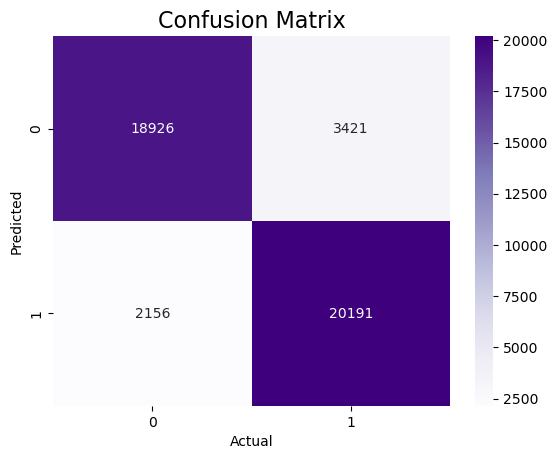

In [113]:
classification_metrics(y_train_os,y_predDTCTrain)

accuracy score is : 0.8287519747235387
F1 score is : 0.7092680747558125
precision score is : 0.3889980353634578
recall score is : 0.7973154362416107


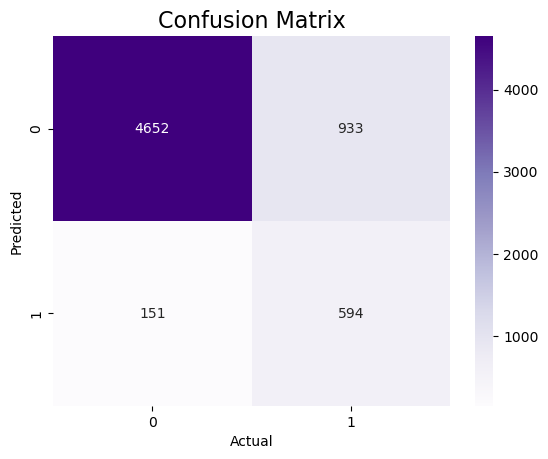

In [114]:
classification_metrics(y_test,y_predDTC)

In [115]:
import optuna
def objective(trial):
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    max_depth = trial.suggest_int("max_depth", 3, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
    )

    model.fit(X_train_os, y_train_os)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

best_params = study.best_params
print("Best hyperparameters: {}".format(best_params))


[I 2023-06-25 05:19:49,173] A new study created in memory with name: no-name-97e7707f-3076-4ded-8872-8617764e51e4
[I 2023-06-25 05:19:49,588] Trial 0 finished with value: 0.8282780410742496 and parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8282780410742496.
[I 2023-06-25 05:19:49,874] Trial 1 finished with value: 0.7927330173775672 and parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8282780410742496.
[I 2023-06-25 05:19:50,082] Trial 2 finished with value: 0.7175355450236967 and parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8282780410742496.
[I 2023-06-25 05:19:50,308] Trial 3 finished with value: 0.804739336492891 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 0 with val

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 9}


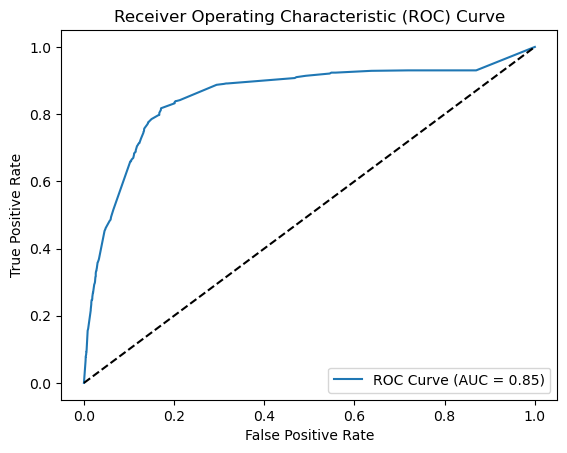

In [116]:
y_pred_prob = DTC.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_DTC = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_DTC)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Comparing Model Performance

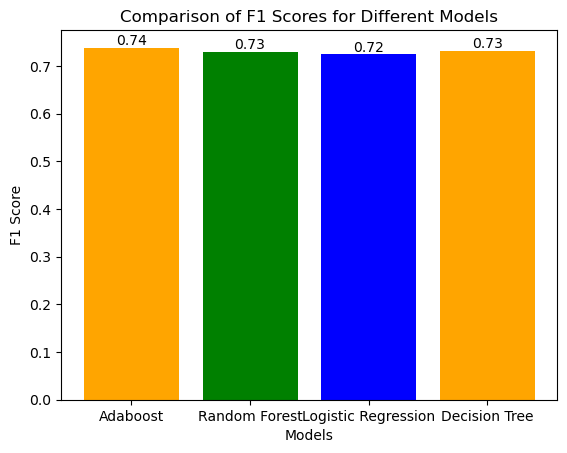

In [117]:
import matplotlib.pyplot as plt
f1_scores = [0.738, 0.730, 0.724,0.732]
model_labels = ['Adaboost', 'Random Forest', 'Logistic Regression','Decision Tree']
x_ticks = range(len(model_labels))
colors = ['orange', 'green', 'blue']

plt.bar(x_ticks, f1_scores, color=colors)

plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Different Models')
plt.xticks(x_ticks, model_labels)

for i, score in enumerate(f1_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')
plt.show()

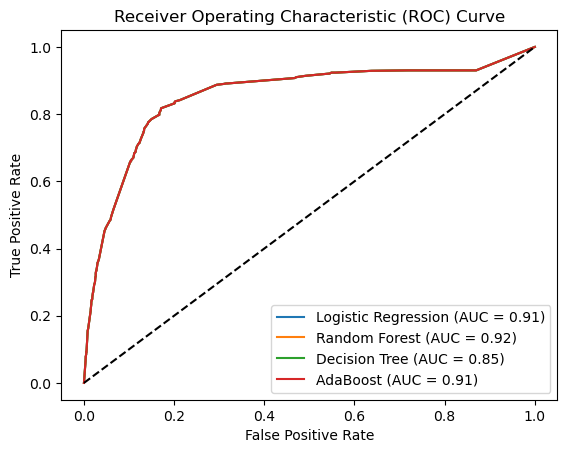

In [118]:
# Plot ROC curves
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc_LR)
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % auc_RFC)
plt.plot(fpr, tpr, label='Decision Tree (AUC = %0.2f)' % auc_DTC)
plt.plot(fpr, tpr, label='AdaBoost (AUC = %0.2f)' % auc_adac)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Conclusion

Among these 4 models Adaboost gave slightly betteer result f1 score wise but Random forest give AUC better but logistic regression is easily interpretable and we can get an idea which 
coefficients dominate more,by interpreting this coefficients business can identify and take decision based on this,Below are the few
informations regarding those coefficients are dominating more 

Based on the coefficients obtained from your logistic regression model, we can interpret the impact of each feature on the prediction of fixed deposit subscription. Here's the interpretation and Answered earlier business related queries with Answers:

Q.Which customer attributes and campaign-related factors are most influential in predicting the likelihood of a customer subscribing to a term deposit?

Ans-No there is no such customer attributes find out here that can influence target variable,however the most influential feature 
is Duration of campaign/product pitch call with the customer.

Q.How accurately can we predict the likelihood of a customer subscribing to a term deposit?

Ans-There is 91% of chance we are predict the likelihood of a customer that he/she will subscribe to a term deposit or not?

Q.How can the bank optimize its marketing strategies to increase the conversion rates for term deposits?

Ans-Duration: The feature "duration" has the highest coefficient of 5.314351. This suggests that for every unit(mostly minutue) increase in the duration of the marketing call, the odds of a customer subscribing to a fixed deposit increase by a factor of exp(5.314351).It indicates that longer call durations have a significant positive impact on the likelihood of a subscription.

Rest of the features have the higher coefficient are month.This means if the marketing call make or reach out tocustomers in   any other way in the month of may(1.45),july(1.99),september(2.58),november(1.05) times higher probability that the customer     will likely subscribe the fixed deposit.In EDA process we already saw the may month showing good results in terms of        subscription fixed deposit.